In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_path = 'Python_study/data/yulu_rental.csv'
df = pd.read_csv(data_path)

1. Які погодні умови максимізують прокат велосипедів?

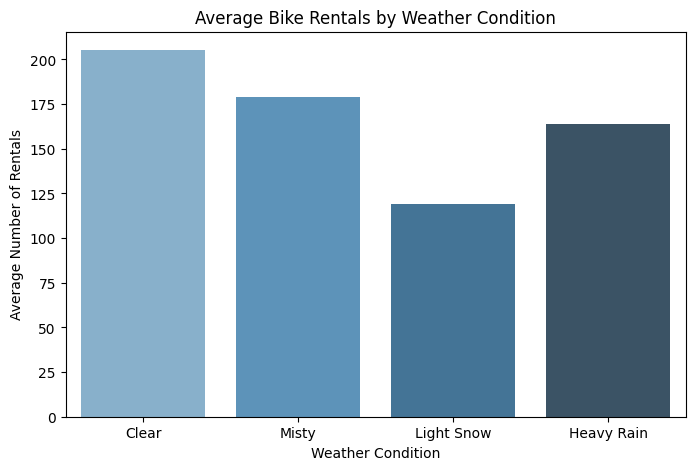

In [42]:
weather_rentals = df.groupby('weather')['count'].mean().reset_index()

weather_map = {1: 'Clear', 2: 'Misty', 3: 'Light Snow', 4: 'Heavy Rain'}
weather_rentals['weather'] = weather_rentals['weather'].map(weather_map)

plt.figure(figsize=(8, 5))
sns.barplot(x='weather', y='count', data=weather_rentals, hue='weather', dodge=False, palette='Blues_d', legend=False)
plt.title('Average Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Number of Rentals')

plt.savefig('average_rentals_by_weather_condition.png')
plt.show(1)

Статистика: якщо ясна або м’яка погода сприятиме більшій кількості прокатів, Yulu може орієнтуватися на рекламні пропозиції або збільшити кількість велосипедів у цей час.

Рекомендація: акції за сприятливих погодних умов і забезпечення більшої кількості доступних велосипедів у періоди найбільшої активності користувачів.

2. Як прокат велосипедів залежить від часу доби та сезону в робочі дні та у вихідні/святкові дні?

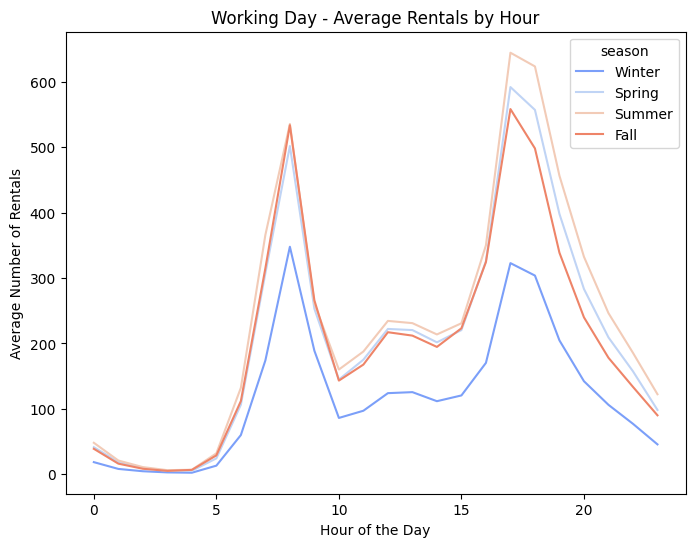

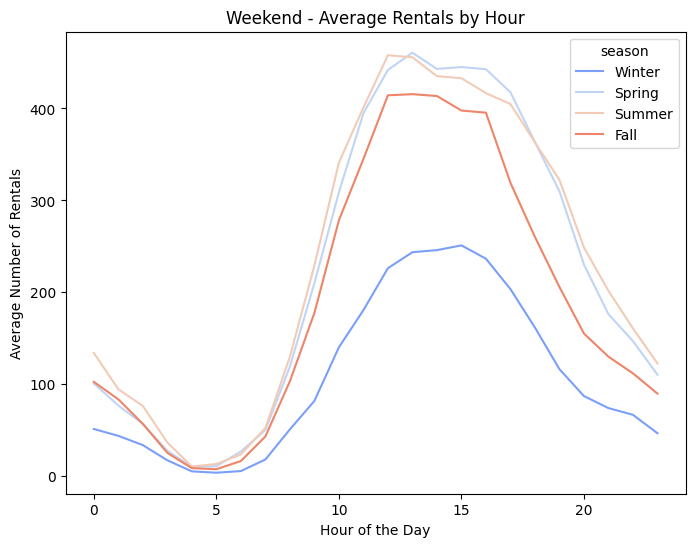

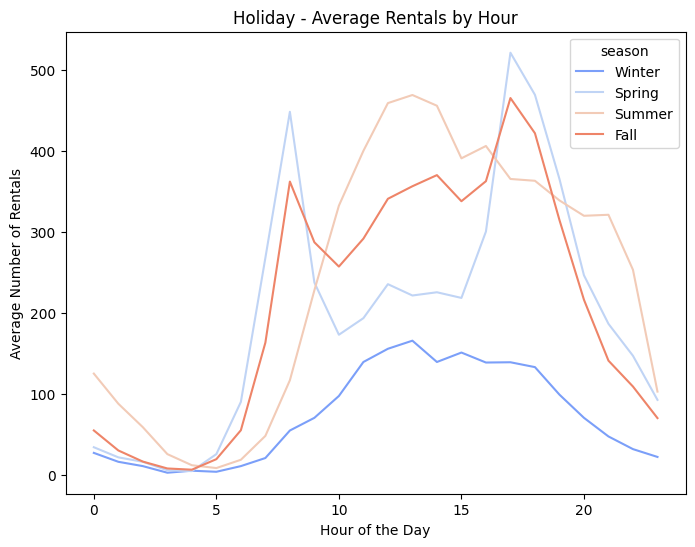

In [38]:
df['hour'] = pd.to_datetime(df['datetime']).dt.hour

df['day_type'] = df.apply(
    lambda row: 'Holiday' if row['holiday'] == 1 else 'Working Day' if row['workingday'] == 1 else 'Weekend', axis=1)

time_day_rentals = df.groupby(['day_type', 'season', 'hour'])['count'].mean().reset_index()

season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
time_day_rentals['season'] = time_day_rentals['season'].map(season_map)

day_types = ['Working Day', 'Weekend', 'Holiday']

for day_type in day_types:
    plt.figure(figsize=(8, 6))
    
    sns.lineplot(data=time_day_rentals[time_day_rentals['day_type'] == day_type], 
                 x='hour', y='count', hue='season', palette='coolwarm')
    
    plt.title(f'{day_type} - Average Rentals by Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Number of Rentals')
    
    plt.savefig(f'{day_type}_average_rentals.png')
    
    plt.show()

Статистика часу доби: цей аналіз показує час пікового прокату, що може сприяти кращому управлінню кількості велосипедів, наприклад використовувати більше велосипедів у години пік.

Сезонна інформація: компанія дізнаєтесь, як попит змінюється не лише в залежності від часу доби, але й у залежності від сезону. Це допоможе компанії Yulu вирішити, чи потрібно їм розширювати свій автопарк чи пропонувати рекламні кампанії в періоди високого попиту, як-от літні вечори чи весняні вихідні.

3. Який вплив швидкості вітру на оренду в різні сезони?

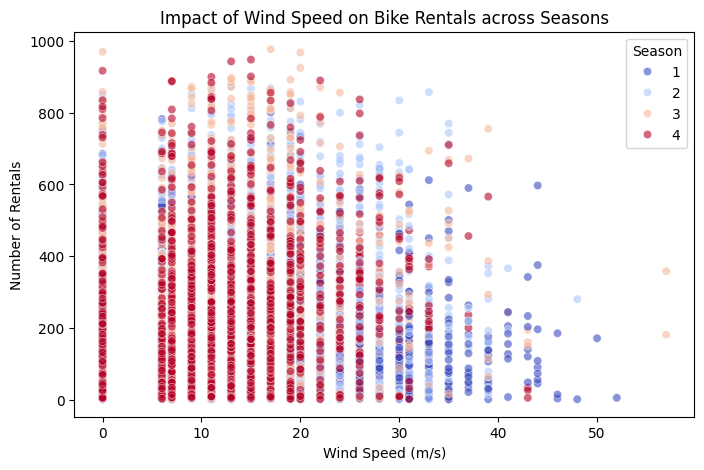

In [43]:
plt.figure(figsize=(8, 5))

sns.scatterplot(x='windspeed', y='count', hue='season', data=df, palette='coolwarm', alpha=0.6)

plt.title('Impact of Wind Speed on Bike Rentals across Seasons')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Number of Rentals')
plt.legend(title='Season')

plt.savefig('wind_speed.png')
plt.show()

Статистика: більша швидкість вітру стримує оренду взимку, але має менший ефект влітку, отримавши цю інформацію Yulu може підготуватися, зменшивши доступність велосипедів у вітряні зимові дні, але зберігаючи регулярні послуги влітку.

Рекомендація: компанії варто налаштувати доступність автопарку, графіки технічного обслуговування та маркетингові стратегії залежно від швидкості вітру та пори року.